In [1]:
import sys
import os
import dlib
import glob
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

In [3]:
dlib.DLIB_USE_CUDA 

False

# Loading detection and recognition models

In [107]:
face_detector_path = "D:/Library/models/mmod_human_face_detector.dat"
predictor_path = "D:/Library/models/shape_predictor_5_face_landmarks.dat"
face_rec_model_path = "D:/Library/models/dlib_face_recognition_resnet_model_v1.dat"
faces_folder_path = "C:/Users/mamin/Desktop/image"

In [109]:
detector = dlib.get_frontal_face_detector()
face_detector = dlib.cnn_face_detection_model_v1(face_detector_path)
sp = dlib.shape_predictor(predictor_path)
facerec = dlib.face_recognition_model_v1(face_rec_model_path)

# Creating dataset

#### creating empty database file

In [72]:
img_address =  "C:/Users/mamin/Desktop/image/a5.jpg"

In [73]:
img = dlib.load_rgb_image(img_address)

In [110]:
# dets = detector(img, 2)
dets = face_detector(img)
print("Number of faces detected: {}".format(len(dets)))

Number of faces detected: 2


In [111]:
win = dlib.image_window()
win.set_image(img)

In [120]:
dets[1].confidence

1.0909260511398315

In [121]:
d = dets[0].rect
shape = sp(img,d) 
win.clear_overlay()
win.add_overlay(d)
win.add_overlay(shape)

In [103]:
face_chip = dlib.get_face_chip(img, shape,150, 0.05)
face_descriptor_from_prealigned_image = facerec.compute_face_descriptor(face_chip)  

In [104]:
face_descriptor_from_prealigned_image

dlib.vector([-0.156557, 0.0708432, 0.116574, -0.0574754, -0.0827374, -0.0659592, -0.0974168, -0.0975218, 0.133017, -0.0767538, 0.274459, -0.0114112, -0.132553, -0.0104457, -0.0424383, 0.142121, -0.118483, -0.143555, -0.0698334, -0.143547, 0.0200621, -0.0148743, -0.048223, 0.086104, -0.177159, -0.281572, -0.0905092, -0.0576024, 0.0554967, -0.0734913, -0.00354834, -0.00907655, -0.167822, -0.0543535, 0.0290319, 0.127587, 0.00248134, -0.0641571, 0.245685, -0.0421873, -0.101689, 0.066092, 0.0946176, 0.255434, 0.153647, 0.0607414, 0.0936652, 0.018053, 0.134827, -0.227976, 0.0761981, 0.10589, 0.135891, 0.0578619, 0.15122, -0.222435, -0.0314904, 0.179062, -0.0972339, 0.149829, -0.00376409, -0.0196048, 0.0207756, -0.0757773, 0.204052, 0.11353, -0.0915996, -0.0939335, 0.164499, -0.085906, -0.0354667, 0.0630327, -0.116953, -0.168524, -0.260672, 0.0669933, 0.412196, 0.164203, -0.209465, 0.0371002, 0.0302332, -0.0208217, 0.0549442, -0.0386903, -0.0961491, 0.0189909, -0.115771, 0.0485747, 0.247117, 

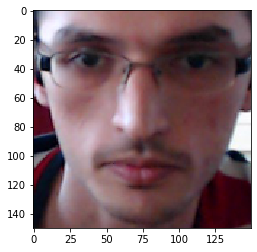

In [105]:
plt.imshow(face_chip)

In [89]:
database_address = 'C:/Users/mamin/GitHub/FaceRecognition/demo_database/'

In [90]:
ID = 1001

In [91]:
first_data = {'ID' : ID,
              'FirstName' : 'Amin',
              'LastName' : 'Kashi',
              'RecognitionID' : [np.array(face_descriptor_from_prealigned_image)],
              'imageAddress' : database_address + 'images/' + str(ID) + '.jpg'}

In [92]:
database = pd.DataFrame(first_data)

In [93]:
database.to_hdf(database_address+'database_fixed_compress.hdf', 'test', mode='w', complib='blosc')

In [94]:
dbase = pd.read_hdf(database_address+'database_fixed_compress.hdf')

In [106]:
np.linalg.norm(dbase.RecognitionID[0] - np.array(face_descriptor_from_prealigned_image))

0.4561092843460463

# Compare function

In [27]:

def compare(vec1, vec2):
    return np.linalg.norm(vec1 - vec2) < 0.6

# Test

In [7]:
win = dlib.image_window()

In [8]:
# # Now process all the images
# for f in glob.glob(os.path.join(faces_folder_path, "*.jpg")):
#     print("Processing file: {}".format(f))
#     img = dlib.load_rgb_image(f)

#     win.clear_overlay()
#     win.set_image(img)

#     # Ask the detector to find the bounding boxes of each face. The 1 in the
#     # second argument indicates that we should upsample the image 1 time. This
#     # will make everything bigger and allow us to detect more faces.
#     dets = detector(img, 1)
#     print("Number of faces detected: {}".format(len(dets)))

#     # Now process each face we found.
#     for k, d in enumerate(dets):
#         print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
#             k, d.left(), d.top(), d.right(), d.bottom()))
#         # Get the landmarks/parts for the face in box d.
#         shape = sp(img, d)
#         # Draw the face landmarks on the screen so we can see what face is currently being processed.
#         win.clear_overlay()
#         win.add_overlay(d)
#         win.add_overlay(shape)

#         # Compute the 128D vector that describes the face in img identified by
#         # shape.  In general, if two face descriptor vectors have a Euclidean
#         # distance between them less than 0.6 then they are from the same
#         # person, otherwise they are from different people. Here we just print
#         # the vector to the screen.
#         face_descriptor = facerec.compute_face_descriptor(img, shape)
#         print(face_descriptor)
#         # It should also be noted that you can also call this function like this:
#         #  face_descriptor = facerec.compute_face_descriptor(img, shape, 100, 0.25)
#         # The version of the call without the 100 gets 99.13% accuracy on LFW
#         # while the version with 100 gets 99.38%.  However, the 100 makes the
#         # call 100x slower to execute, so choose whatever version you like.  To
#         # explain a little, the 3rd argument tells the code how many times to
#         # jitter/resample the image.  When you set it to 100 it executes the
#         # face descriptor extraction 100 times on slightly modified versions of
#         # the face and returns the average result.  You could also pick a more
#         # middle value, such as 10, which is only 10x slower but still gets an
#         # LFW accuracy of 99.3%.
#         # 4th value (0.25) is padding around the face. If padding == 0 then the chip will
#         # be closely cropped around the face. Setting larger padding values will result a looser cropping.
#         # In particular, a padding of 0.5 would double the width of the cropped area, a value of 1.
#         # would triple it, and so forth.

#         # There is another overload of compute_face_descriptor that can take
#         # as an input an aligned image. 
#         #
#         # Note that it is important to generate the aligned image as
#         # dlib.get_face_chip would do it i.e. the size must be 150x150, 
#         # centered and scaled.
#         #
#         # Here is a sample usage of that

#         print("Computing descriptor on aligned image ..")
        
#         # Let's generate the aligned image using get_face_chip
#         face_chip = dlib.get_face_chip(img, shape)        

#         # Now we simply pass this chip (aligned image) to the api
#         face_descriptor_from_prealigned_image = facerec.compute_face_descriptor(face_chip)                
#         print(face_descriptor_from_prealigned_image)        
        
#         dlib.hit_enter_to_continue()

In [5]:
img_address =  "C:/Users/mamin/Desktop/image/photo5881017655656294741.jpg"
# img_address =  "C:/Users/mamin/Desktop/image/ba.jpg"
# img_address =  "C:/Users/mamin/Desktop/image/bald_guys.jpg"
# img_address =  "C:/Users/mamin/Desktop/image/a4.jpg"
# img_address =  "C:/Users/mamin/Desktop/image/test.jpg"
# img_address = 'C:/Users/mamin/Desktop/image/DSC02197.jpg'
img = dlib.load_rgb_image(img_address)

In [10]:
win.set_image(img)

In [11]:
dets = detector(img, 1)
print("Number of faces detected: {}".format(len(dets)))

Number of faces detected: 24


In [12]:
type(dets)

dlib.rectangles

In [11]:
i=0

In [12]:

d = dets[i]
shape = sp(img,d) 
i = i+1
win.clear_overlay()
win.add_overlay(d)
win.add_overlay(shape)

In [12]:
ace_descriptor = facerec.compute_face_descriptor(img, shape)

In [56]:
face_chip = dlib.get_face_chip(img, shape,150,0.6)  

In [15]:
face_descriptor_from_prealigned_image = facerec.compute_face_descriptor(face_chip)  

In [24]:
np.linalg.norm(np.array(ace_descriptor,np.float32) - np.array(face_descriptor_from_prealigned_image))

0.0

# Cemara demo

In [5]:
import time
from IPython.display import clear_output

In [8]:
import numpy as np
import cv2

dbase = pd.read_hdf(database_address+'database_fixed_compress.hdf')
cap = cv2.VideoCapture(1)

while(True):
    # Capture frame-by-frame
    t = time.time()
    ret, frame = cap.read()
    
    t1 = time.time() -t
    t = time.time()
    
    dets = detector(frame, 1)
    
    t2 = time.time() -t
    
    for i, subject in enumerate(dets):
        
        t = time.time()
        
        cv2.rectangle(frame,(subject.right(),subject.top()),(subject.left(),subject.bottom()),(0,255,0),3)
        
        t3 = time.time() -t
        t = time.time()
        
        shape = sp(frame, subject)
        
        t4 = time.time() -t
        t = time.time()
        
        face_chip = dlib.get_face_chip(frame, shape,150,0.25)
        t5 = time.time() -t
        t = time.time()
        
        face_descriptor_from_prealigned_image = facerec.compute_face_descriptor(face_chip)  
        
        t6 = time.time() -t
        t = time.time()
        
        text = "unknown"
        for index in dbase.index:
            if compare(dbase.RecognitionID[index], np.array(face_descriptor_from_prealigned_image)):
                text = dbase.FirstName[index] + ' ' + dbase.LastName[index]
        
        t7 = time.time() -t
        t = time.time()
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame,text,(subject.left(),subject.bottom()+10), font, 1,(255,255,255),2,cv2.LINE_AA)
    
    t = time.time()
    # Display the resulting frame
    cv2.imshow('frame',frame)
    
    t8 = time.time() -t

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    clear_output()
    print('t1 : ' + str(t1))
    print('t2 : ' + str(t2))
    print('t3 : ' + str(t3))
    print('t4 : ' + str(t4))
    print('t5 : ' + str(t5))
    print('t6 : ' + str(t6))
    print('t7 : ' + str(t7))
    print('t8 : ' + str(t8))
    
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

t1 : 0.24047350883483887
t2 : 0.38495826721191406


NameError: name 't3' is not defined

In [1]:
from multiprocessing import Pool

def f(x):
    return x*x

In [ ]:
with Pool(5) as p:
    print(p.map(f, [1, 2, 3]))